In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Import, read, and write data frames

df1 = pd.read_csv("Resources/co2_emission.csv")
df2 = pd.read_csv("Resources/car_prices.csv")

,Couple#,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,1,2,2,4,1,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,2,4,4,4,4,4,0,0,4,4,...,2,2,3,4,4,4,4,2,2,1
2,3,2,2,2,2,1,3,2,1,1,...,3,2,3,1,1,1,2,2,2,1
3,4,3,2,3,2,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,5,2,2,1,1,1,1,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
# Display the DataFrame for CO2 Emissions
df1.head()

In [ ]:
# Display the DataFrame for European Car Prices
df2.head()

In [ ]:
# Pre-process and clean CO2 Emissions data set 
# Drop non-essential columns
co2_df = df1.copy()
co2_df = co2_df['Vehicle Identifier', 'Total fuel consumed (lifetime) (l)', 
                'Total distance travelled (lifetime) (km)', 'Country', 
                'Mk', 'Cn', 'Ewltp (g/km)', 'Ft', 'Erwltp (g/km)', 'Year', 
                'Fuel consumption']

# Rename columns
co2_df = co2_df.rename(columns={'Mk': 'brand', 'Ewltp (g/km)': 'CO2 Emissions (per WLTP)', 'Ft': 'Fuel Type'})
co2_df.columns

In [ ]:
# Display of first 20 lines of CO2 emissions dataset
co2_df.head(20)

In [ ]:
# Pre-process and clean European Car Prices data set 
# Drop non-essential columns
prices_df = df2.copy()
prices_df = prices_df['ye', 'type', 'brand', 'model', 'eurpr']

# Rename columns
prices_df = prices_df.rename(columns={'ye': 'Year', 'eurpr': 'Price (Euro)'})
prices_df.columns

In [ ]:
# Drop all rows with missing information in CO2 Emissions data set
co2_df = co2_df.dropna(how='any')

In [ ]:
# Check dtypes in CO2 Emissions data set
co2_df.dtypes

In [ ]:
# Drop all rows with missing information in European Car Prices data set
prices_df = prices_df.dropna(how='any')

In [ ]:
# Check dtypes in European Car Prices data set
prices_df.dtypes

In [ ]:
# Encode CO2 Emissions data set using pd.get_dummies()
co2_data_dummies = pd.get_dummies(co2_df)
co2_data_dummies.head()

In [ ]:
# Encode European Car Prices data set using pd.get_dummies()
prices_data_dummies = pd.get_dummies(prices_df)
prices_data_dummies.head()

In [ ]:
# Visualization of CO2 Emissions by Make
co2_brand_df = co2_data_dummies
co2_df.groupby('brand').agg(np.mean).sort_values(by='CO2 Emissions (per WLTP)',ascending=True).plot.barh(y='CO2 Emissions (per WLTP)')
#co2_brand_df = co2_df[co2_df['Fuel Type'] == 'Petrol']
#co2_emissions = co2_brand_df.sort_values(by=['CO2 Emissions (per WLTP)'], ascending=False).head(10)
#upper_mean_2021_chart = upper_mean_2021.plot.bar(y=['Households Mean Income (Dollars)'], rot=0, width=0.8, figsize=(10,5),ylim=(0,300000),\n",
#                         title='2021CY - Top 10 Upper Household Mean Income \\nby Zip Code\\n',\n",
#                         xlabel='\\nZip Code',\n",
#                         ylabel='Mean Income (USD)\\n',\n",
#                         color='forestgreen')"

In [ ]:
# Visualization of CO2 Emissions by Country
co2_country_df = co2_data_dummies
co2_df.groupby('Country').agg(np.mean).sort_values(by='CO2 Emissions (per WLTP)',ascending=True).plot.barh(y='CO2 Emissions (per WLTP)')

In [ ]:
# Visualization of European Car Prices by Brand
prices_brand_df = prices_data_dummies
prices_df.groupby('brand').agg(np.mean).sort_values(by='Price (Euro)',ascending=True).plot.barh(y='Price (Euro)')


In [ ]:
# Scatterplot of Total Fuel Consumed over a Lifetime vs. C02 emission  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df, x='Total fuel consumed (lifetime) (l)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
plt.title('\nScatterplot of Total Fuel Consumed vs. C02 emission\n')
plt.xlabel('\nTotal Fuel Consumed by Vehicle Lifetime (Liters)\n')
plt.ylabel('\nCO2 Emissions (g/km)\n')
plt.legend(title='Total Fuel Consumed over a Lifetime vs. C02 emission')
plt.show()

In [ ]:
# Scatterplot of Total Distance Traveled over a Lifetime vs. C02 emission  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df, x='Total distance travelled (lifetime) (km)', y='CO2 Emissions (per WLTP)', palette='coolwarm')
plt.title('\nScatterplot of Total Distance Traveled vs. C02 emission\n')
plt.xlabel('\nTotal Distance Traveled by Vehicle (kilometers) \n')
plt.ylabel('\nCO2 Emissions\n')
plt.legend(title='Total Distance Traveled over a Lifetime vs. C02 emission')
plt.show()

In [ ]:
# Scatterplot of Total Fuel Consumed over a Lifetime vs. Total Distance Traveled over a Lifetime  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_df, x='Total distance travelled (lifetime) (km)', y='Total fuel consumed (lifetime) (l)', palette='coolwarm')
plt.title('\nScatterplot of Total Fuel Consumed -vs- Total Distance Traveled over a Lifetime\n')
plt.xlabel('\nTotal Distance Traveled by Vehicle (kilometers) \n')
plt.ylabel('\nTotal Fuel Consumed by Vehicle Lifetime (Liters)\n')
plt.legend(title='Total Fuel Consumed over a Lifetime -vs- Total Distance Traveled over a Lifetime')
plt.show()

In [ ]:
# Highest to lowest Correlation - CO2 Emissions data set
# 'CO2 Emissions' is a column in our dataframe
# Calculate correlation of features with 'CO2 Emissions (per WLTP)' and drop 'CO2 Emissions (per WLTP)' itself
corr = co2_df.corr()['CO2 Emissions (per WLTP)'].drop('CO2 Emissions (per WLTP)')

# Sort correlations by absolute values and take top 10
sort_corr = corr.abs().sort_values(ascending=False)[:10]

# Display the sorted correlations
print(sort_corr)

# Calculate the correlation matrix of the top correlated features
top_features = sort_corr.index.tolist()

# List of the top features
corr_top_features = co2_df[top_features].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 4))

# Create a heatmap of the correlations of the top features
sns.heatmap(corr_top_features,
            annot=True,  # Annotate cells with correlation values
            xticklabels=corr_top_features.columns,
            yticklabels=corr_top_features.columns,
            cmap="plasma")

# Add a title to the heatmap
plt.title("\nTop Features Correlation Analysis\n", fontsize=20)

# Display the plot
plt.show()

In [ ]:
# Correlation / Bar chart - CO2 Emissions
# Show bar chart to compare correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=sort_corr.index, y=sort_corr)
plt.xticks(rotation=90)
plt.xlabel('\nFeatures\n', fontsize=16)
plt.ylabel('\nAbsolute Correlation\n', fontsize=16)
plt.title( f"\nAbsolute Correlation -vs- Features \n", fontsize=18)
plt.show()

In [ ]:
# Merge CO2 Emissions and European Car Prices dataframe on Brand
new_df = pd.merge(co2_df, prices_df, on='brand')
new_df.reset_index(drop=True)
new_df = new_df.dropna(how='any')
new_df.head()

In [7]:
# Drop the label to create the X data

X = new_df.drop("<List the features here>", axis=1)
X

,Couple#,Sorry_end,No_home_time,2_strangers,common_goals,freeom_value,entertain,love,marriage,trust,...,know_well,friends_social,Aggro_argue,Always_never,hate_subjects,silence_for_harm,silence_fear_anger,I'm_right,no_hesitancy_inadequate,incompetence
0,1,2,0,0,0,0,1,1,0,1,...,0,1,1,2,1,2,1,3,3,1
1,2,4,0,0,4,3,4,4,4,2,...,1,1,0,4,4,2,2,3,4,2
2,3,2,3,2,2,4,2,3,3,2,...,3,2,3,3,1,3,2,3,2,2
3,4,3,3,3,3,3,3,3,3,4,...,1,3,2,3,3,2,2,3,2,2
4,5,2,1,0,0,1,0,1,1,1,...,1,1,1,1,0,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,166,0,0,0,0,0,0,0,0,0,...,0,0,4,4,0,1,0,4,2,2
166,167,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,1,2,3,2
167,168,1,0,0,1,1,1,1,0,1,...,0,1,1,1,1,3,0,2,3,0
168,169,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,3,2,4,1


In [8]:
# Create the y set from the "Divorce_Y_N" column

y = new_df["<List the target here>"]
y


0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Divorce_Y_N, Length: 170, dtype: int64

In [15]:
# Split the data into training and testing sets using random_state=1

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=1)

In [16]:
# Scale the X data by using StandardScaler()

Scaler = StandardScaler().fit(X_train)
X_train_scale = Scaler.transform(X_train)
X_train_scale


array([[-0.05682364, -1.09451276, -0.82032067, ..., -2.44877613,
        -1.69785764, -0.58350879],
       [-0.85423823,  1.41004798,  1.30581658, ...,  1.11563153,
         0.99749136,  1.22394528],
       [-0.23624192,  1.41004798, -0.82032067, ...,  1.11563153,
        -1.02402039, -1.18599348],
       ...,
       [-0.29604802,  0.78390779,  0.24274795, ...,  0.22452962,
         0.32365411,  0.62146059],
       [ 1.05955679, -1.09451276,  0.24274795, ..., -0.6665723 ,
         0.32365411,  0.0189759 ],
       [-0.99378579,  0.78390779,  0.24274795, ...,  1.11563153,
         0.32365411,  1.22394528]])

In [17]:
# Transform the test dataset based on the fit from the training dataset

X_test_scale = Scaler.transform(X_test)
X_test_scale


array([[-0.77449677,  1.41004798,  1.30581658, -0.56481532,  0.28478735,
         0.26359329,  1.51404804,  0.34648653,  0.3186699 ,  0.38109917,
         0.32718241,  0.49742085,  1.63975507,  0.35551897,  1.17598517,
         1.2054088 ,  1.2557978 ,  1.05964346,  1.08307584,  1.11563153,
         0.99749136,  1.22394528],
       [ 0.08272392, -1.09451276, -0.82032067, -0.56481532, -1.13356534,
        -1.10278825, -1.25262967, -0.98696163, -0.96612621, -0.92699799,
        -1.0351837 , -0.87589324, -0.93121893, -0.99226936, -0.69870249,
        -0.65394648, -1.07246965, -0.40312523, -1.48796401, -0.6665723 ,
        -1.02402039, -1.18599348],
       [-1.35262235,  1.41004798, -0.82032067, -0.56481532,  0.9939637 ,
         1.62997482,  1.51404804,  1.01321061,  1.60346602,  1.68919633,
         1.68954853,  1.18407789,  1.63975507,  1.7033073 ,  1.17598517,
         0.58562371,  0.67373093,  0.32825911,  1.08307584,  0.22452962,
         0.99749136,  1.22394528],
       [-1.03365652

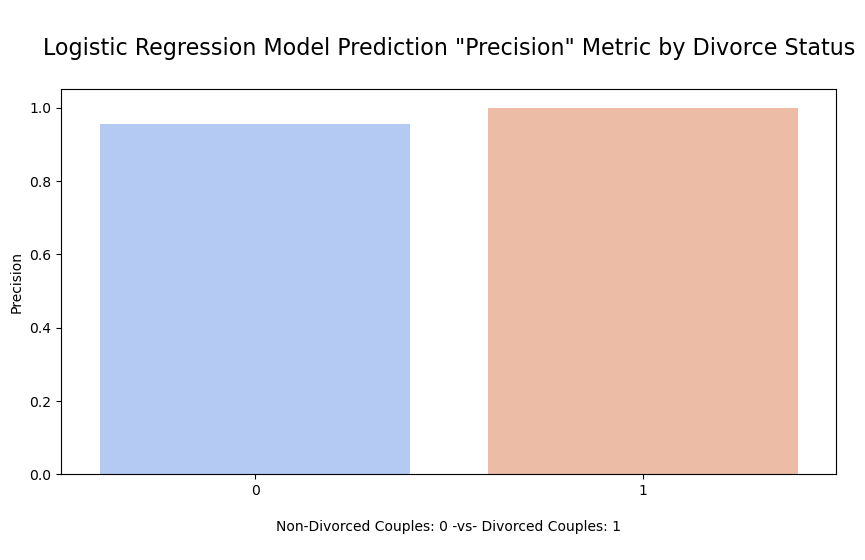

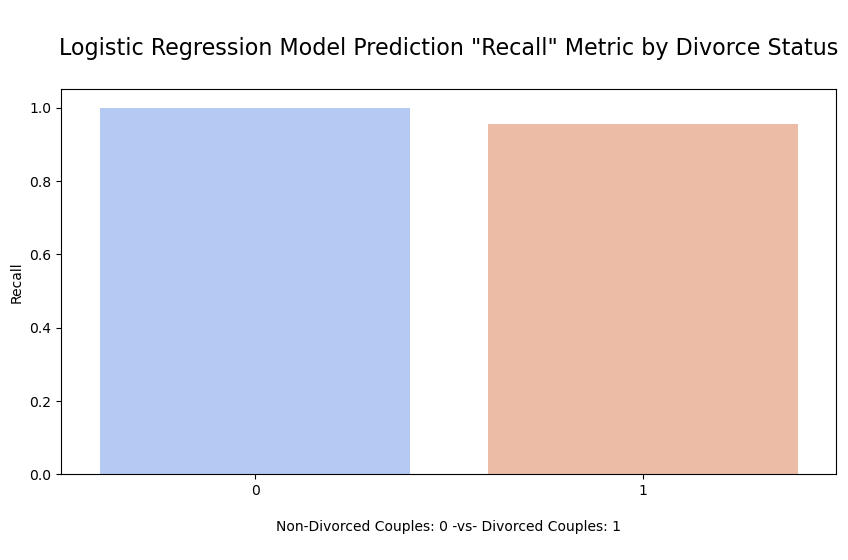

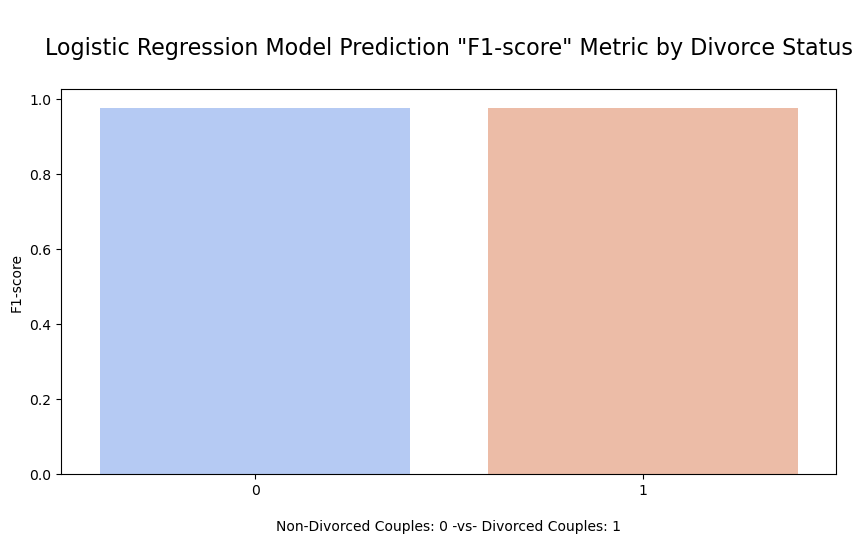

In [20]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scale, y_train)

# Make predictions on the test data
lr_predictions = lr_model.predict(X_test_scale)
lr_predictions

# Create a classification report
lr_cr = classification_report(y_test, lr_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_lr_cr_report = pd.DataFrame(lr_cr).transpose()
df_lr_cr_report

classes = df_lr_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_lr_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nLogistic Regression Model Prediction "{metric.capitalize()}" Metric by Price\n', fontsize=16)
    plt.xlabel('\nTBD\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


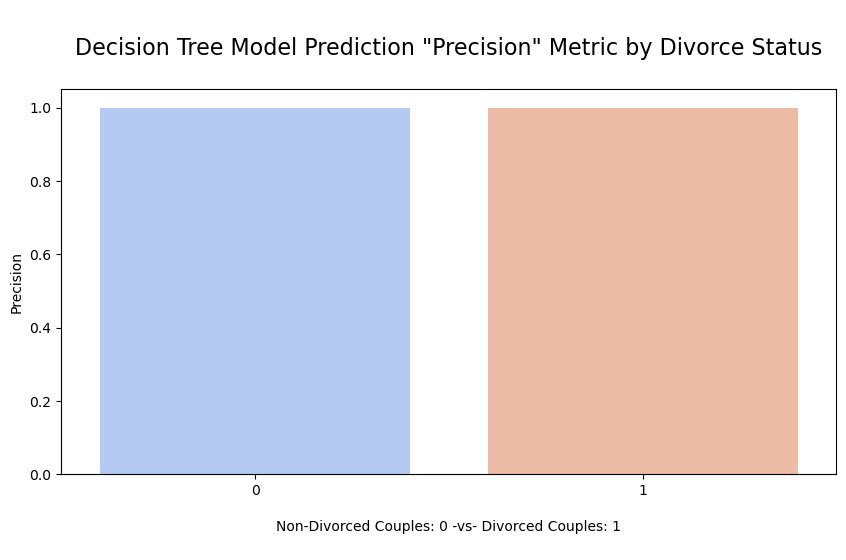

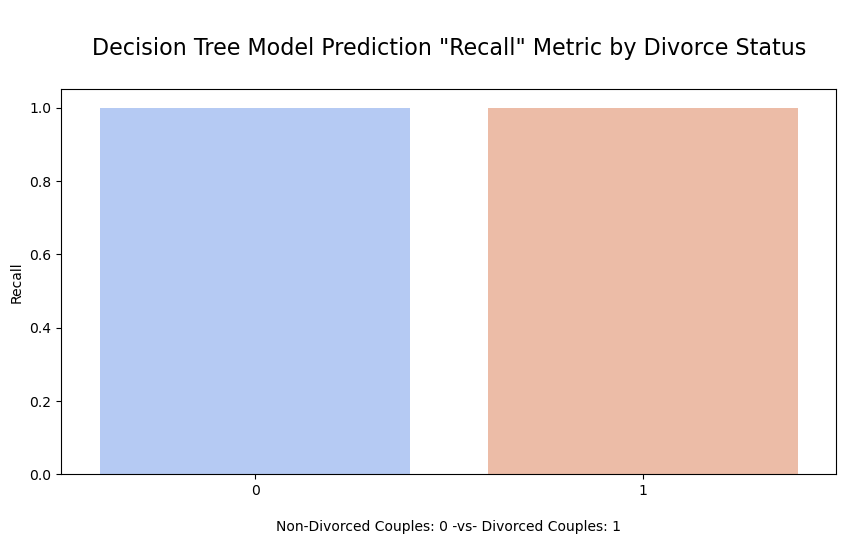

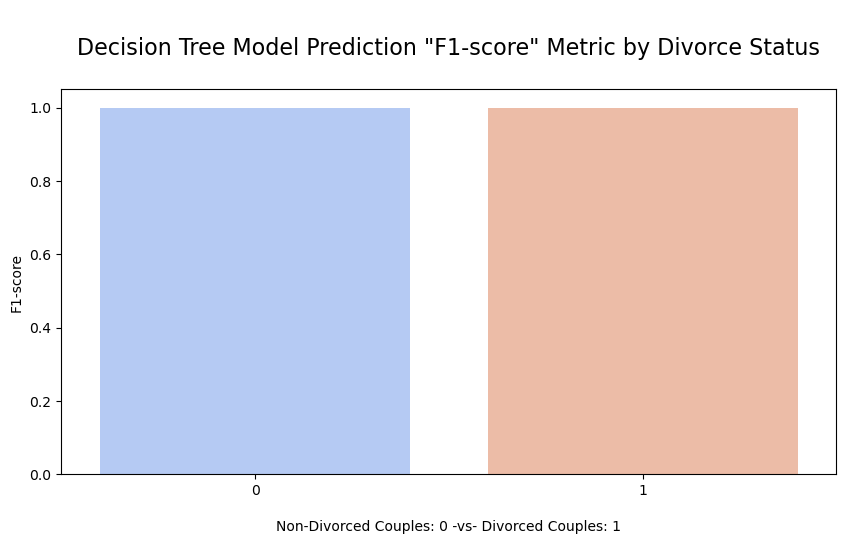

In [21]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scale, y_train)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test_scale)
dt_predictions

# Create a classification report
dt_cr = classification_report(y_test, dt_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_dt_cr_report = pd.DataFrame(dt_cr).transpose()
df_dt_cr_report

classes = df_dt_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_dt_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nDecision Tree Model Prediction "{metric.capitalize()}" Metric by Price\n', fontsize=16)
    plt.xlabel('\nTBD\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()



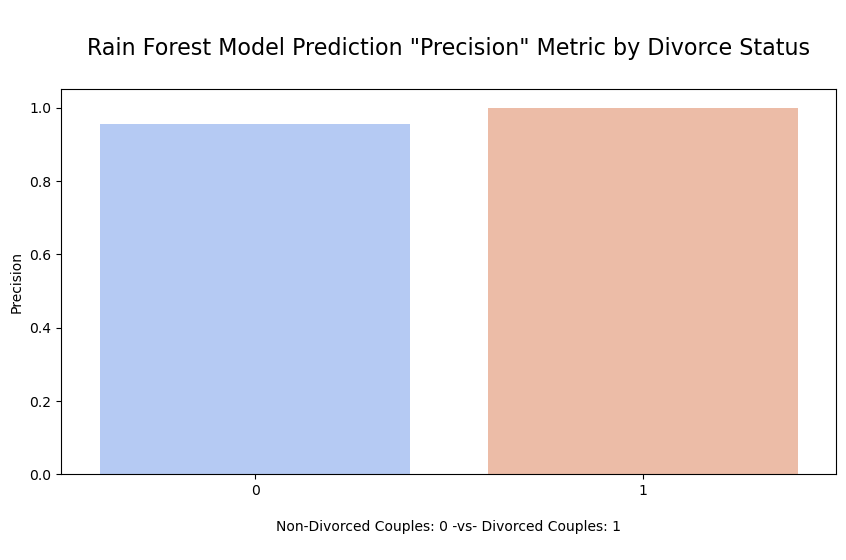

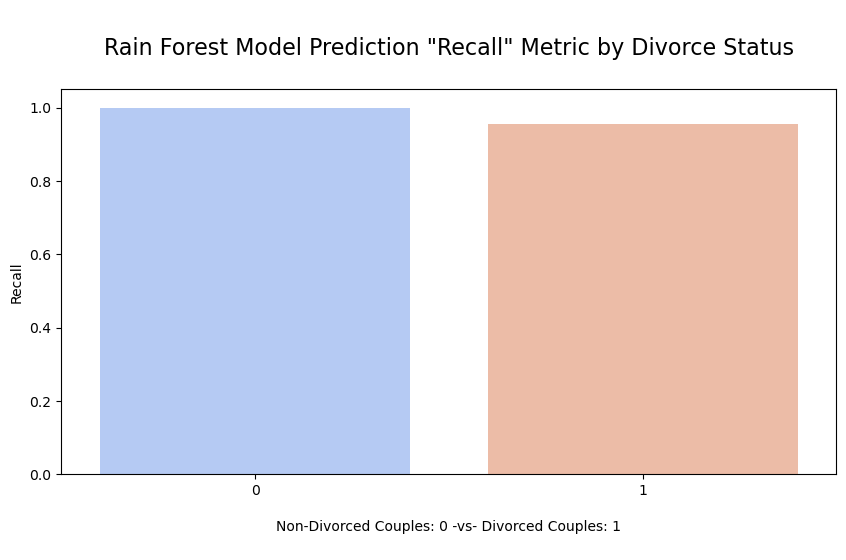

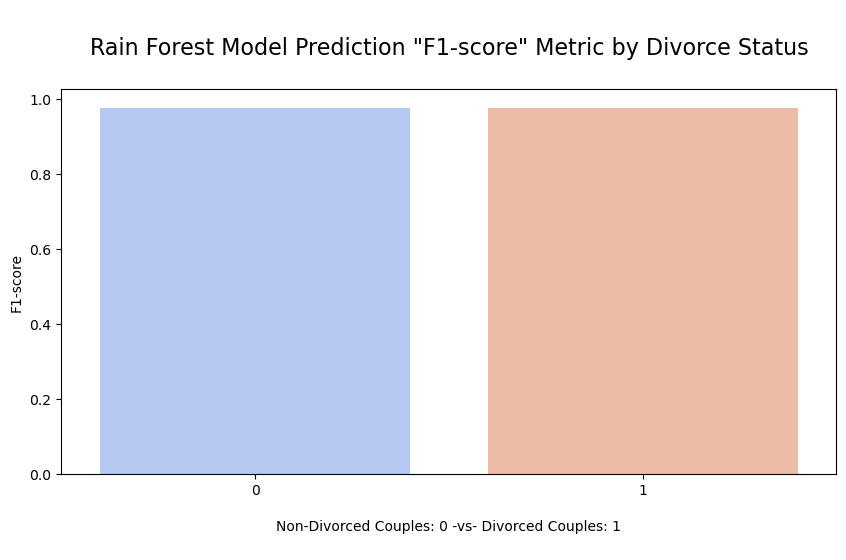

In [22]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scale, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scale)
rf_predictions

# Create a classification report
rf_cr = classification_report(y_test, rf_predictions, output_dict=True)

# Plot the classification report
# Convert the report to a DataFrame for plotting
df_rf_cr_report = pd.DataFrame(rf_cr).transpose()
df_rf_cr_report

classes = df_rf_cr_report.index[:-3]
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=df_rf_cr_report[metric][:-3], palette='coolwarm')
    plt.title(f'\nRain Forest Model Prediction "{metric.capitalize()}" Metric by Price\n', fontsize=16)
    plt.xlabel('\nTBD\n')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.show()


In [23]:
# Validate the model by checking the model accuracy with model.score
print(f"Random Forest Model Training Accuracy: {rf_model.score(X_train_scale, y_train)}")
print(f"Random Forest Model Testing Accuracy: {rf_model.score(X_test_scale, y_test)}")

print(f"Decision Tree Model Training Accuracy: {dt_model.score(X_train_scale, y_train)}")
print(f"Decision Tree Model Testing Accuracy: {dt_model.score(X_test_scale, y_test)}")

#print(f"K-nearest neighbor Model Training Accuracy: {neigh_model.score(X_train_scale, y_train)}")
#print(f"K-nearest neighbor Model Testing Accuracy: {neigh_model.score(X_test_scale, y_test)}")

print(f"Logistic Regression Model Training Accuracy: {lr_model.score(X_train_scale, y_train)}")
print(f"Logistic Regression Model Testing Accuracy: {lr_model.score(X_test_scale, y_test)}")


Random Forest Model Training Accuracy: 1.0
Random Forest Model Testing Accuracy: 0.9767441860465116
Decision Tree Model Training Accuracy: 1.0
Decision Tree Model Testing Accuracy: 1.0
Logistic Regression Model Training Accuracy: 1.0
Logistic Regression Model Testing Accuracy: 0.9767441860465116


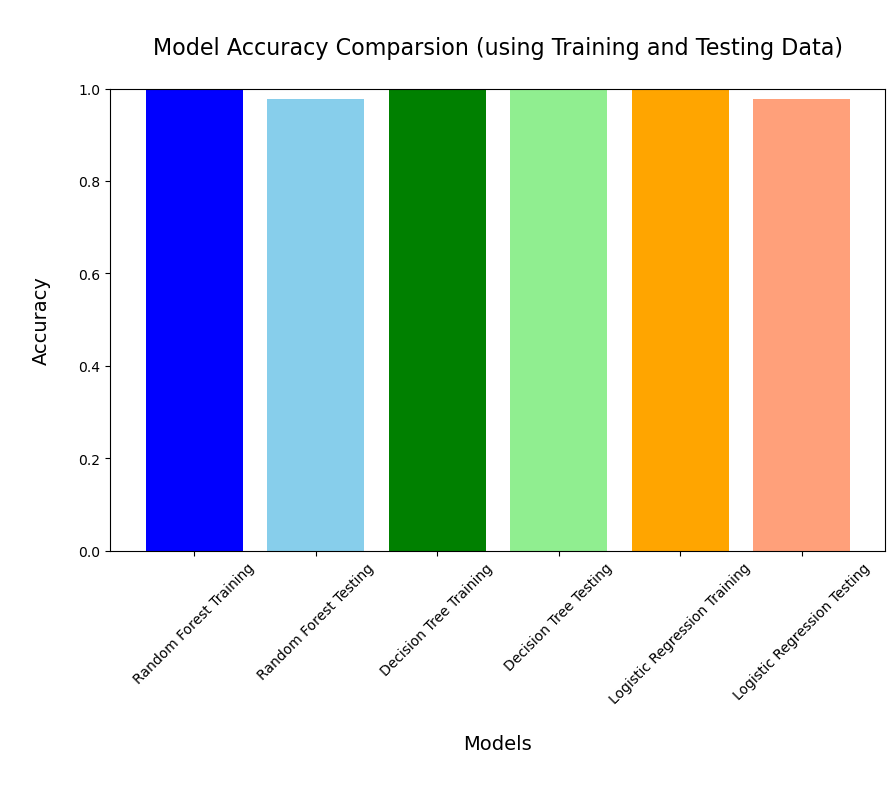

In [24]:
# Create a chart to compare Accuracy of each Model

# Model names
models = [
    'Random Forest Training', 
    'Random Forest Testing',
    'Decision Tree Training',
    'Decision Tree Testing',
#    'K-nearest neighbor Training',
#    'K-nearest neighbor Testing',
    'Logistic Regression Training',
    'Logistic Regression Testing'
    ]

# Model scores
scores = [
    rf_model.score(X_train_scale, y_train),
    rf_model.score(X_test_scale, y_test),
    dt_model.score(X_train_scale, y_train),
    dt_model.score(X_test_scale, y_test),
#    neigh_model.score(X_train_scale, y_train),
#    neigh_model.score(X_test_scale, y_test),
    lr_model.score(X_train_scale, y_train),
    lr_model.score(X_test_scale, y_test)
]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'skyblue', 'green', 'lightgreen', 'orange', 'lightsalmon', 'red', 'pink'])
plt.xticks(rotation=45)
plt.xlabel('\nModels\n', fontsize=14)
plt.ylabel('\nAccuracy\n', fontsize=14)
plt.title('\nModel Accuracy Comparsion (using Training and Testing Data)\n', fontsize=16)
plt.ylim(0, 1)
plt.show()

18 - NN Day 3 Activity #6 - Making Predictions

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our utilities functions
import utils

Prepare the Data

In [ ]:
# Get the original DataFrame for new users
df = utils.get_new_data()
df.head()

In [ ]:
# Get the normalized ratings
normalized_ratings = utils.get_normalized_new_data()
normalized_ratings.head()

In [ ]:
# Get the weights and bias tensors
W = utils.weights()
hb = utils.hidden_bias()
vb = utils.visible_bias()

In [ ]:
# Get new users
user_list = normalized_ratings.index

In [ ]:
# Select a test user
test_user = user_list[0]

# Get the ratings row for the test user
user_ratings = normalized_ratings.loc[test_user]
user_ratings

In [ ]:
# Get the recommendations for the user
rec = utils.generate_recommendation(user_ratings, W, vb, hb)

# Construct user recommendation DataFrame
# movie_id = Make and user_id = price and recommendationscore = CO2 emissions
user_recommendation = pd.DataFrame({"movie_id": normalized_ratings.columns, "user_id": test_user})
user_recommendation = user_recommendation.assign(RecommendationScore = rec[0].numpy())

# View sorted user recommendation
user_recommendation.sort_values(["RecommendationScore"], ascending=False).head(20)

In [ ]:
# Merge user recommendation scores with original dataset ratings
merged_df = user_recommendation.merge(df, on=['movie_id', 'user_id'], how='outer')
merged_df.sort_values(["RecommendationScore"], ascending=False).head(20)

In [ ]:
# Reduce the merged DataFrame to locate the unrated movies that have a
# recommendation score higher than 0.5 to find the movies to recommend
movies_to_recommend = merged_df.loc[
    (merged_df["RecommendationScore"] > 0.5) & (pd.isna(merged_df["rating"])),
    "movie_id"
].to_list()
movies_to_recommend